In [34]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [61]:
# Plot your data to see what's in your DataFrame
plot = df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)
plot

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
normalized_data = scaler.fit_transform(df_market_data)

# Convert the normalized data back to a DataFrame
df_normalized = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the first few rows of the normalized DataFrame
df_normalized.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [6]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
crypto_names = df_market_data.index
df_scaled = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=crypto_names)

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12) 


In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_market_data)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
inertia_values


c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[69983541.80285285,
 8193203.593539453,
 2592706.8825531797,
 835227.4380640759,
 437329.5311132971,
 269606.06382899976,
 213057.5948030947,
 157329.52476206073,
 118743.87920655253,
 93040.66565973038,
 73661.3948318411]

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters (k)': range(1, 12),
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow


,Number of Clusters (k),Inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.592707e+06
3,4,8.352274e+05
4,5,4.373295e+05
5,6,2.696061e+05
6,7,2.130576e+05
7,8,1.573295e+05
8,9,1.187439e+05
9,10,9.304067e+04


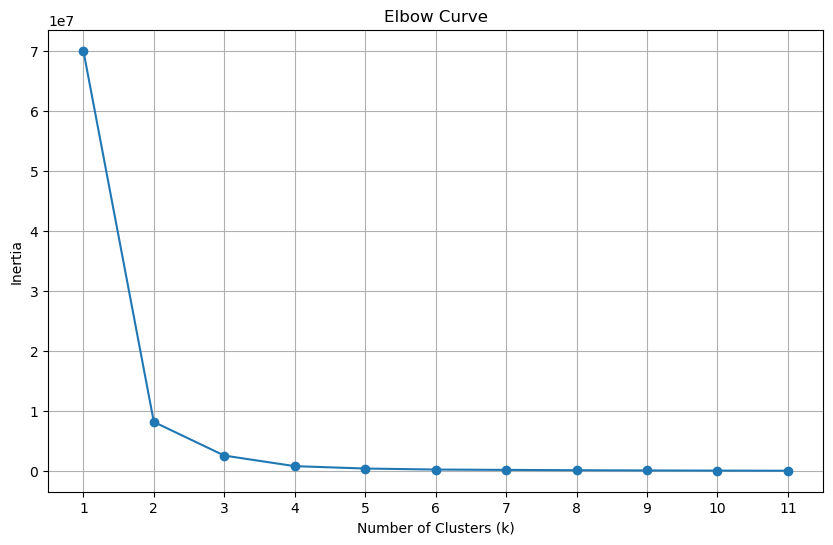

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['Number of Clusters (k)'], df_elbow['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

It appears the for this data set, the most optimal k value is 3.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
best_k = 3
kmeans_model = KMeans(n_clusters=best_k, random_state=42)


In [12]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [13]:
# Predict the clusters using the scaled data
cluster_predictions = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values
print(cluster_predictions)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2
 1 1 1 1]


In [14]:
# Create a copy of the DataFrame
df_copy = df_market_data.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data['Predicted_Cluster'] = cluster_predictions

# Display sample data
df_market_data.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted_Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,1
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,1
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,1


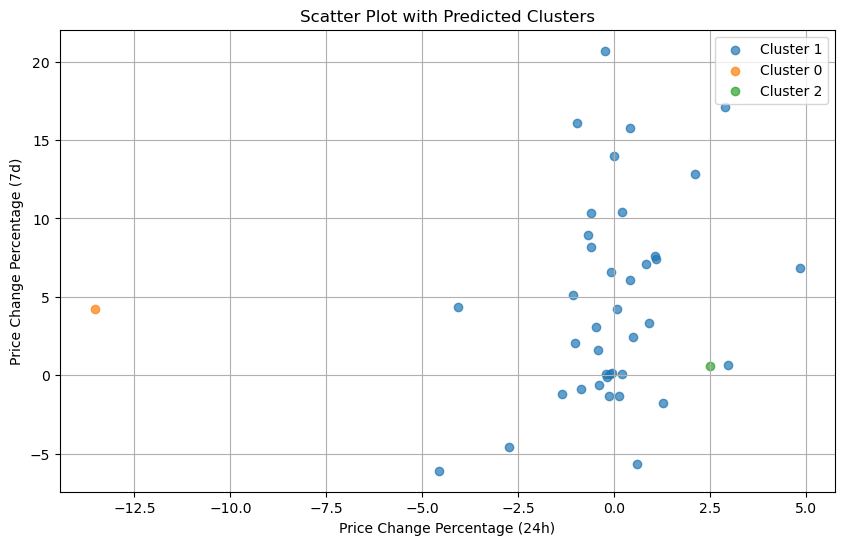

In [60]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import matplotlib.pyplot as plt

# Create a scatter plot with Matplotlib
plt.figure(figsize=(10, 6))
for cluster in df_market_data['Predicted_Cluster'].unique():
    cluster_data = df_market_data[df_market_data['Predicted_Cluster'] == cluster]
    plt.scatter(cluster_data['price_change_percentage_24h'], 
                cluster_data['price_change_percentage_7d'], 
                label=f'Cluster {cluster}', 
                alpha=0.7)
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.title('Scatter Plot with Predicted Clusters')
plt.legend()
plt.grid(True)
plt.show()



---

### Optimize Clusters with Principal Component Analysis.

In [35]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [36]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_components = pca_model.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2', 'PCA3'], index=df_scaled.index)

# View the first five rows of the DataFrame. 
df_pca.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [37]:
# Retrieve the explained variance to determine how much information
explained_variance = pca_model.explained_variance_ratio_
 
# can be attributed to each principal component.
for i, ev in enumerate(explained_variance):
    print(f"Explained Variance for PCA{i+1}: {ev:.2f}")

Explained Variance for PCA1: 0.37
Explained Variance for PCA2: 0.35
Explained Variance for PCA3: 0.18


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [38]:
# Calculate the total explained variance
total_explained_variance = sum(pca_model.explained_variance_ratio_)

# Print the total explained variance
print(f"Total Explained Variance of the three principal components: {total_explained_variance:.2f}")


Total Explained Variance of the three principal components: 0.90


In [39]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
crypto_names = df_market_data.index
df_pca_data = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2', 'PCA3'], index=crypto_names)

# Display sample data
df_pca_data.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [41]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [42]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_pca_data`
    kmeans_pca.fit(df_pca_data)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)

# Display the inertia values
print(inertia_values_pca)



c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[256.87408556789234, 165.90199402036, 93.77462568057297, 49.665496651797355, 37.83946598681242, 30.777746141441185, 21.13405603747361, 17.091636643864746, 13.68113969299275, 10.630647573870965, 8.128620320213495]


In [43]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values_pca
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_pca



,Number of Clusters (k),Inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,30.777746
6,7,21.134056
7,8,17.091637
8,9,13.681140
9,10,10.630648


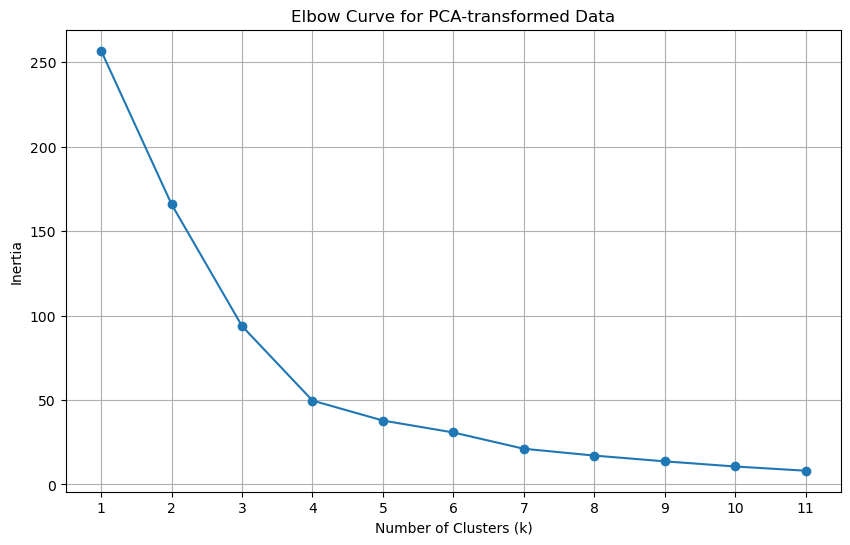

In [44]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_pca['Number of Clusters (k)'], df_elbow_pca['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve for PCA-transformed Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()



#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' is 3.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differs from the best k value found in the original data by on number of clusters or 'k' value.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [46]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=42)


In [47]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca_data)

c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LuisG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [48]:
# Predict the clusters using the PCA data
cluster_predictions_pca = kmeans_model.predict(df_pca_data)

# Print the resulting array of cluster values
print(cluster_predictions_pca)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [49]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['Predicted_Cluster'] = cluster_predictions_pca

# Display sample data
df_pca_copy.head()


,PCA1,PCA2,PCA3,Predicted_Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0


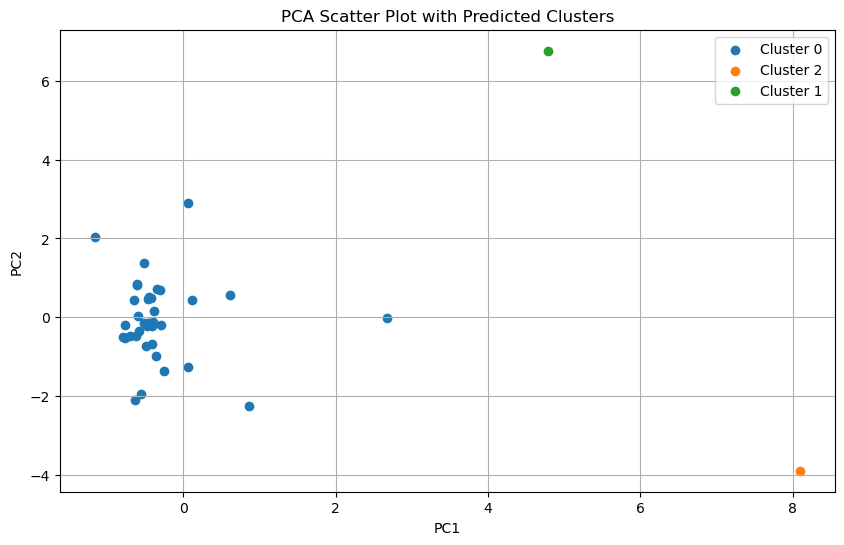

In [52]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import matplotlib.pyplot as plt

# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))
for cluster in df_pca_copy['Predicted_Cluster'].unique():
    plt.scatter(df_pca_copy[df_pca_copy['Predicted_Cluster'] == cluster]['PCA1'],
                df_pca_copy[df_pca_copy['Predicted_Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')
plt.title('PCA Scatter Plot with Predicted Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()



### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

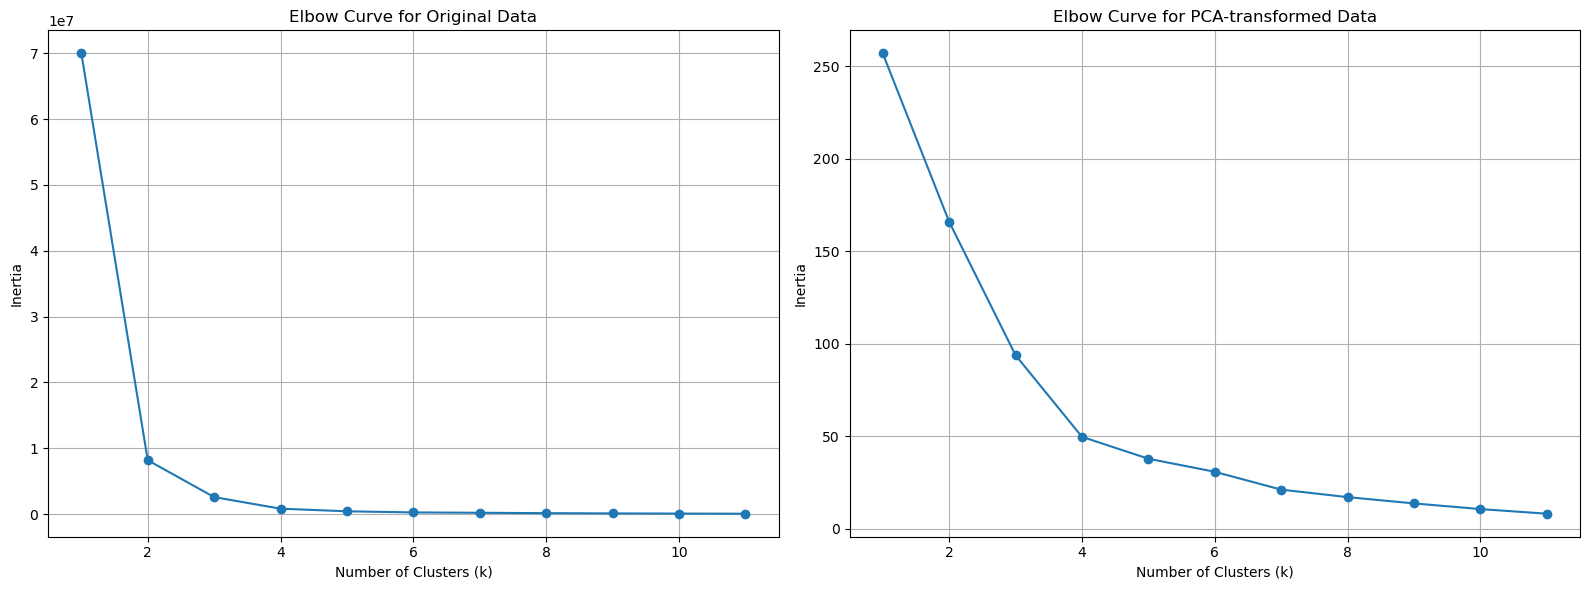

In [53]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the Elbow curve for original data
axs[0].plot(df_elbow['Number of Clusters (k)'], df_elbow['Inertia'], marker='o', linestyle='-')
axs[0].set_title('Elbow Curve for Original Data')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('Inertia')
axs[0].grid(True)

# Plot the Elbow curve for PCA-transformed data
axs[1].plot(df_elbow_pca['Number of Clusters (k)'], df_elbow_pca['Inertia'], marker='o', linestyle='-')
axs[1].set_title('Elbow Curve for PCA-transformed Data')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Inertia')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


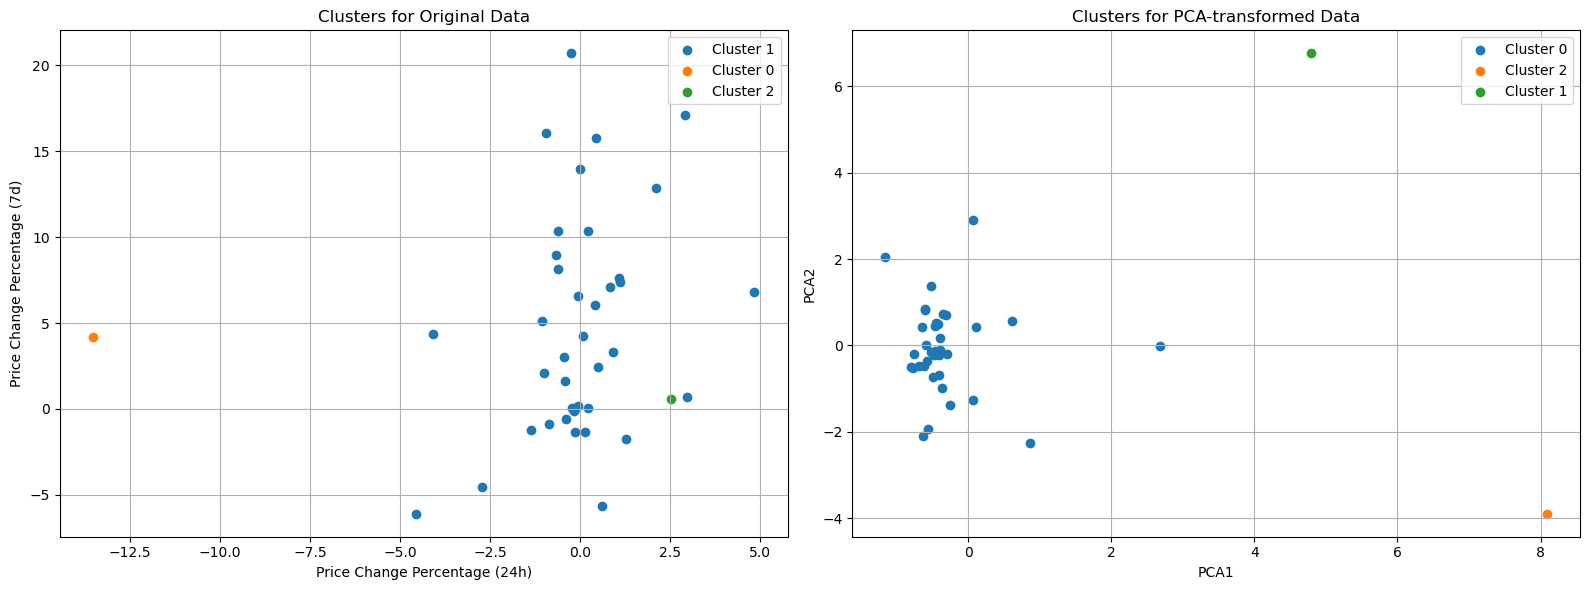

In [59]:
# Composite plot to contrast the clusters
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot clusters for original data
for cluster in df_market_data['Predicted_Cluster'].unique():
    axs[0].scatter(df_market_data[df_market_data['Predicted_Cluster'] == cluster]['price_change_percentage_24h'],
                   df_market_data[df_market_data['Predicted_Cluster'] == cluster]['price_change_percentage_7d'],
                   label=f'Cluster {cluster}')
axs[0].set_title('Clusters for Original Data')
axs[0].set_xlabel('Price Change Percentage (24h)')
axs[0].set_ylabel('Price Change Percentage (7d)')
axs[0].legend()
axs[0].grid(True)

# Plot clusters for PCA-transformed data
for cluster in df_pca_copy['Predicted_Cluster'].unique():
    axs[1].scatter(df_pca_copy[df_pca_copy['Predicted_Cluster'] == cluster]['PCA1'],
                   df_pca_copy[df_pca_copy['Predicted_Cluster'] == cluster]['PCA2'],
                   label=f'Cluster {cluster}')
axs[1].set_title('Clusters for PCA-transformed Data')
axs[1].set_xlabel('PCA1')
axs[1].set_ylabel('PCA2')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Clustering data with fewer features, like using PCA, makes things simpler but might lose some original info. It's faster and easier to understand, but the technique used affects results. So, while fewer features are easier to work with, it's important to balance simplicity with accuracy and understanding.